# Анализ доступных данных

## Подготовка

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

## Загрузка данных

In [2]:
test = pd.read_parquet("../data/raw/test.parquet")
train = pd.read_parquet("../data/raw/train.parquet")
val = pd.read_parquet("../data/raw/val.parquet")

### Общая информация о данных

In [3]:
print(f"Размер тренировочных данных: {train.shape[0]}")
print(f"Размер тестовых данных: {test.shape[0]}")
print(f"Размер данных для валидации: {val.shape[0]}")

Размер тренировочных данных: 11495242
Размер тестовых данных: 2781480
Размер данных для валидации: 2466048


Признаки, которые есть в датасете, их тип и какой объем памяти занимает датасет

In [4]:
train.info(show_counts=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11495242 entries, 0 to 11495241
Data columns (total 19 columns):
 #   Column        Non-Null Count     Dtype         
---  ------        --------------     -----         
 0   event_time    11495242 non-null  object        
 1   event_type    11495242 non-null  object        
 2   product_id    11495242 non-null  object        
 3   brand         11495242 non-null  object        
 4   price         11495242 non-null  object        
 5   user_id       11495242 non-null  object        
 6   user_session  11495176 non-null  object        
 7   target        11495242 non-null  int64         
 8   cat_0         11495242 non-null  object        
 9   cat_1         11495242 non-null  object        
 10  cat_2         11495242 non-null  object        
 11  cat_3         11495242 non-null  object        
 12  timestamp     11495242 non-null  datetime64[us]
 13  ts_hour       11495242 non-null  int16         
 14  ts_minute     11495242 non-null 

In [5]:
test.info(show_counts=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781480 entries, 0 to 2781479
Data columns (total 19 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   event_time    2781480 non-null  object        
 1   event_type    2781480 non-null  object        
 2   product_id    2781480 non-null  object        
 3   brand         2781480 non-null  object        
 4   price         2781480 non-null  object        
 5   user_id       2781480 non-null  object        
 6   user_session  2781436 non-null  object        
 7   target        2781480 non-null  int64         
 8   cat_0         2781480 non-null  object        
 9   cat_1         2781480 non-null  object        
 10  cat_2         2781480 non-null  object        
 11  cat_3         2781480 non-null  object        
 12  timestamp     2781480 non-null  datetime64[us]
 13  ts_hour       2781480 non-null  int16         
 14  ts_minute     2781480 non-null  int16         
 15

In [6]:
val.info(show_counts=True, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466048 entries, 0 to 2466047
Data columns (total 19 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   event_time    2466048 non-null  object        
 1   event_type    2466048 non-null  object        
 2   product_id    2466048 non-null  object        
 3   brand         2466048 non-null  object        
 4   price         2466048 non-null  object        
 5   user_id       2466048 non-null  object        
 6   user_session  2466026 non-null  object        
 7   target        2466048 non-null  int64         
 8   cat_0         2466048 non-null  object        
 9   cat_1         2466048 non-null  object        
 10  cat_2         2466048 non-null  object        
 11  cat_3         2466048 non-null  object        
 12  timestamp     2466048 non-null  datetime64[us]
 13  ts_hour       2466048 non-null  int16         
 14  ts_minute     2466048 non-null  int16         
 15

### Пропуски в данных

Отсутствующие значения наблюдаются только в признаке "user_session"

In [7]:
print(f"Отсутствующие значения в тренировочных данных: {train['user_session'].isna().sum()}")
print(f"Отсутствующие значения в тестовых данных: {test['user_session'].isna().sum()}")
print(f"Отсутствующие значения в данных для валидации: {val['user_session'].isna().sum()}")

Отсутствующие значения в тренировочных данных: 66
Отсутствующие значения в тестовых данных: 44
Отсутствующие значения в данных для валидации: 22


## Подробный анализ

### Данные за какой период есть в датасетах

In [8]:
print(f"Тренировочные данные с {train['event_time'].min()}, {train['event_time'].max()}")
print(f"Тестовые данные с {test['event_time'].min()}, {test['event_time'].max()}")
print(f"Данные для валидации с {val['event_time'].min()}, {val['event_time'].max()}")

Тренировочные данные с 2019-10-01 00:05:14 UTC, 2020-02-29 23:59:50 UTC
Тестовые данные с 2020-04-01 00:00:19 UTC, 2020-04-30 23:59:55 UTC
Данные для валидации с 2020-03-01 00:00:59 UTC, 2020-03-31 23:59:55 UTC


#### Количество унимакальных событий (event_type)

In [9]:
train["event_type"].value_counts()

event_type
cart        7305042
purchase    4190200
Name: count, dtype: int64

In [10]:
test["event_type"].value_counts()

event_type
cart        1821689
purchase     959791
Name: count, dtype: int64

In [11]:
val["event_type"].value_counts()

event_type
cart        1458761
purchase    1007287
Name: count, dtype: int64

#### Уникальных значений товаров (product_id)

In [81]:
products = train["product_id"].unique()
products = np.append(products, test["product_id"].unique())
products = np.append(products, val["product_id"].unique())
print("Всего уникальных товаров во всех датасетах: ", np.unique(products).shape[0])

Всего уникальных товаров во всех датасетах:  214907


In [79]:
print(f"Уникальных значений в обучающих данных: {train['product_id'].nunique()}")
print(f"Уникальных значений в тестовых данных: {test['product_id'].nunique()}")
print(f"Уникальных значений в валидационных данных: {val['product_id'].nunique()}")

Уникальных значений в обучающих данных: 164453
Уникальных значений в тестовых данных: 95793
Уникальных значений в валидационных данных: 95137


In [80]:
print(
    f"Товары, отсутствующие в тренировочных данных, но присутствующие в тестовых данных: ",
    test.loc[~test["product_id"].isin(train["product_id"].unique())]["product_id"].nunique()
)
print(
    f"Товары, отсутствующие в тренировочных данных, но присутствующие в валидационных данных: ",
    val.loc[~val["product_id"].isin(train["product_id"].unique())]["product_id"].nunique()
)

Товары, отсутствующие в тренировочных данных, но присутствующие в тестовых данных:  37058
Товары, отсутствующие в тренировочных данных, но присутствующие в валидационных данных:  22557


#### Бренды

In [65]:
brands = train["brand"].unique()
brands = np.append(brands, test["brand"].unique())
brands = np.append(brands, val["brand"].unique())
print("Всего уникальных брендов во всех датасетах: ", np.unique(brands).shape[0])

Всего уникальных брендов во всех датасетах:  5349


Топ 20 брендов

<Axes: title={'center': 'Топ 20 брендов в тренировочных данных'}, xlabel='Бренды', ylabel='Продажи'>

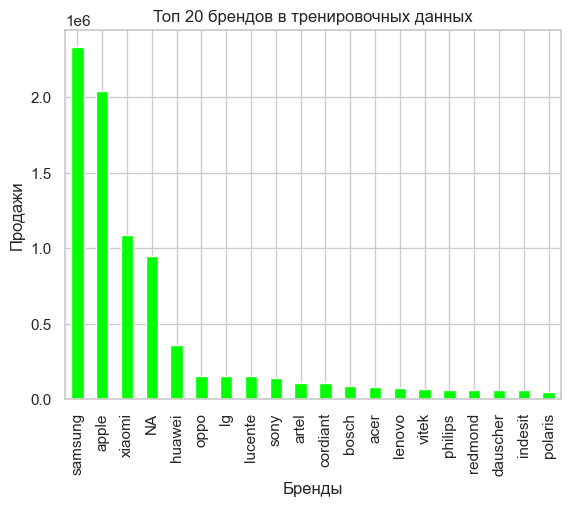

In [74]:
train["brand"].value_counts()[:20].plot(
    kind="bar", color="lime", title="Топ 20 брендов в тренировочных данных", xlabel="Бренды", ylabel="Продажи"
)

<Axes: title={'center': 'Топ 20 брендов в тестовых данных'}, xlabel='Бренды', ylabel='Продажи'>

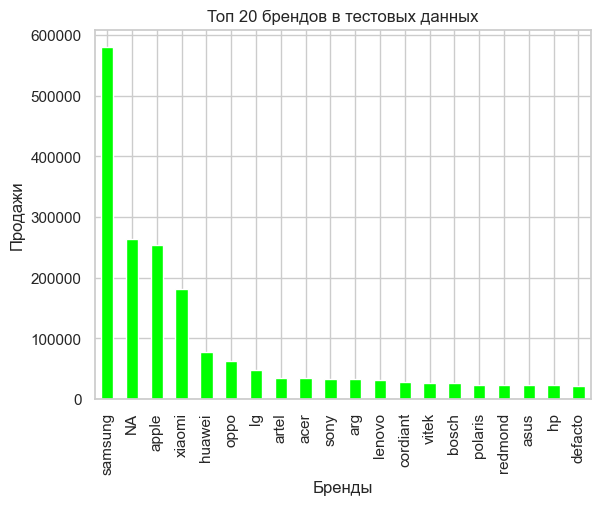

In [75]:
test["brand"].value_counts()[:20].plot(
    kind="bar", color="lime", title="Топ 20 брендов в тестовых данных", xlabel="Бренды", ylabel="Продажи"
)

<Axes: title={'center': 'Топ 20 брендов в валидационных данных'}, xlabel='Бренды', ylabel='Продажи'>

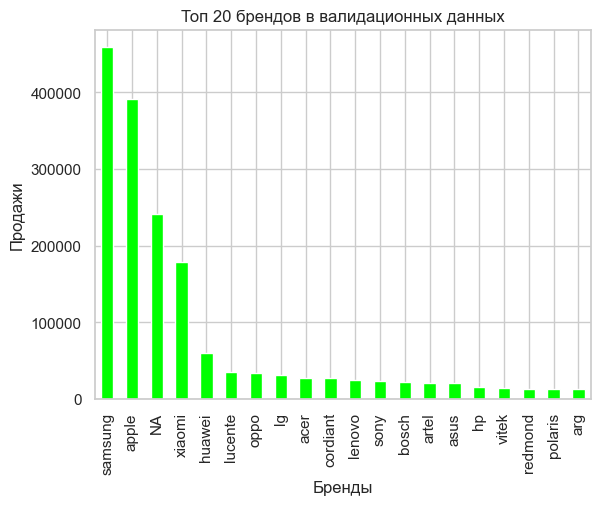

In [76]:
val["brand"].value_counts()[:20].plot(
    kind="bar", color="lime", title="Топ 20 брендов в валидационных данных", xlabel="Бренды", ylabel="Продажи"
)

Достаточно большое количество товаров без бренда.

In [29]:
print(f"В тренировочных данных нет бренда у {train.loc[train['brand'] == 'NA', 'brand'].count()} товаров")
print(f"В тестовых данных нет бренда у {test.loc[train['brand'] == 'NA', 'brand'].count()} товаров")
print(f"В валидационных данных нет бренда у {val.loc[train['brand'] == 'NA', 'brand'].count()} товаров")

В тренировочных данных нет бренда у 949132 товаров
В тестовых данных нет бренда у 237621 товаров
В валидационных данных нет бренда у 214591 товаров


In [50]:
print(
    f"Бренды, отсутствующие в тренировочных данных, но присутствующие в тестовых данных: ",
    test.loc[~test["brand"].isin(train["brand"].unique())]["brand"].nunique()
)
print(
    f"Бренды, отсутствующие в тренировочных данных, но присутствующие в валидационных данных: ",
    val.loc[~val["brand"].isin(train["brand"].unique())]["brand"].nunique()
)

Бренды, отсутствующие в тренировочных данных, но присутствующие в тестовых данных:  605
Бренды, отсутствующие в тренировочных данных, но присутствующие в валидационных данных:  332


### Информация о пользователях

In [85]:
users = train["user_id"].unique()
users = np.append(users, test["user_id"].unique())
users = np.append(users, val["user_id"].unique())
print("Всего уникальных пользователей во всех датасетах: ", np.unique(users).shape[0])

Всего уникальных пользователей во всех датасетах:  3584809


In [84]:
print(f"Уникальных пользователей в обучающих данных: {train['user_id'].nunique()}")
print(f"Уникальных пользователей в тестовых данных: {test['user_id'].nunique()}")
print(f"Уникальных пользователей в валидационных данных: {val['user_id'].nunique()}")

Уникальных пользователей в обучающих данных: 2547058
Уникальных пользователей в тестовых данных: 979981
Уникальных пользователей в валидационных данных: 807030


In [86]:
print(
    f"Холодные пользователи в тестовых данных: ",
    test.loc[~test["user_id"].isin(train["user_id"].unique())]["user_id"].nunique()
)
print(
    f"Холодные пользователи в валидационных данных: ",
    val.loc[~val["user_id"].isin(train["user_id"].unique())]["user_id"].nunique()
)

Холодные пользователи в тестовых данных:  683407
Холодные пользователи в валидационных данных:  434042


### Сессии пользователей

In [90]:
train["user_session"] = train["user_session"].fillna("NA")
test["user_session"] = test["user_session"].fillna("NA")
val["user_session"] = val["user_session"].fillna("NA")
sessions = train["user_session"].unique()
sessions = np.append(sessions, test["user_session"].unique())
sessions = np.append(sessions, val["user_session"].unique())
print("Всего уникальных пользователей во всех датасетах: ", np.unique(sessions).shape[0])

Всего уникальных пользователей во всех датасетах:  10715053


In [92]:
print(f"Уникальных сессий в обучающих данных: {train['user_session'].nunique()}")
print(f"Уникальных сессий в тестовых данных: {test['user_session'].nunique()}")
print(f"Уникальных сессий в валидационных данных: {val['user_session'].nunique()}")

Уникальных сессий в обучающих данных: 7279440
Уникальных сессий в тестовых данных: 1826140
Уникальных сессий в валидационных данных: 1638659


In [152]:
print(
    f"Сессия перешедшая из тренировочных данных в тестовые данные: ",
    test.loc[test["user_session"].isin(train["user_session"].unique())]["user_session"].nunique()
)
print(
    f"Сессия перешедшая из тренировочных данных в валидационные данные: ",
    val.loc[val["user_session"].isin(train["user_session"].unique())]["user_session"].nunique()
)

Сессия перешедшая из тренировочных данных в тестовые данные:  7672
Сессия перешедшая из тренировочных данных в валидационные данные:  20916


In [159]:
session_aggregation = train.groupby(["user_session"]).agg(
    {"product_id": "count", "event_time": ["min", "max"]}
)

In [170]:
session_aggregation.columns = ["product_count", "event_time_start", "event_time_end"]

In [173]:
session_aggregation["event_time_start"] = pd.to_datetime(session_aggregation["event_time_start"])
session_aggregation["event_time_end"] = pd.to_datetime(session_aggregation["event_time_end"])

In [181]:
session_aggregation["durability"] = session_aggregation["event_time_end"] - session_aggregation["event_time_start"]

In [184]:
print(f"Максимальная длительность сессии: {session_aggregation['durability'].max()}")
print(f"Средняя длительность сессии: {session_aggregation['durability'].mean()}")

Максимальная длительность сессии: 151 days 17:15:08
Средняя длительность сессии: 1 days 23:49:11.590982273


In [186]:
print("Максимальное количество товаров за сессию: ", session_aggregation['product_count'].max().item())

Максимальное количество товаров за сессию:  807


In [187]:
print("Минимальное количество товаров за сессию: ", session_aggregation['product_count'].min().item())

Минимальное количество товаров за сессию:  1


### Target

<Axes: title={'center': 'Распределение классов в тренировочной выборке'}, xlabel='target'>

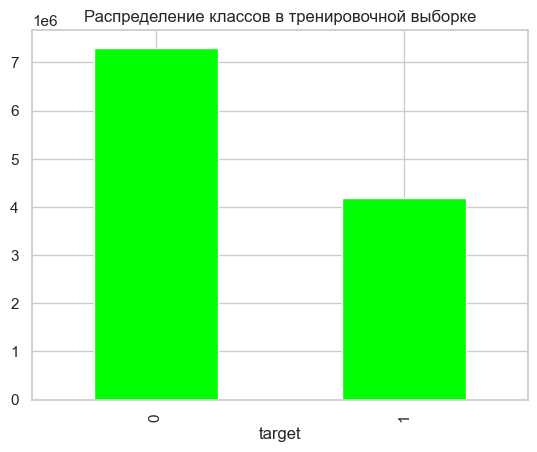

In [192]:
train["target"].value_counts().plot(kind="bar", color="lime", title="Распределение классов в тренировочной выборке")

<Axes: title={'center': 'Распределение классов в тестовой выборке'}, xlabel='target'>

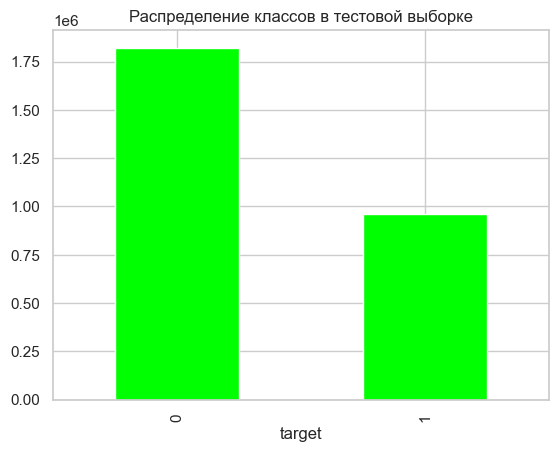

In [193]:
test["target"].value_counts().plot(kind="bar", color="lime", title="Распределение классов в тестовой выборке")

<Axes: title={'center': 'Распределение классов в валидационной выборке'}, xlabel='target'>

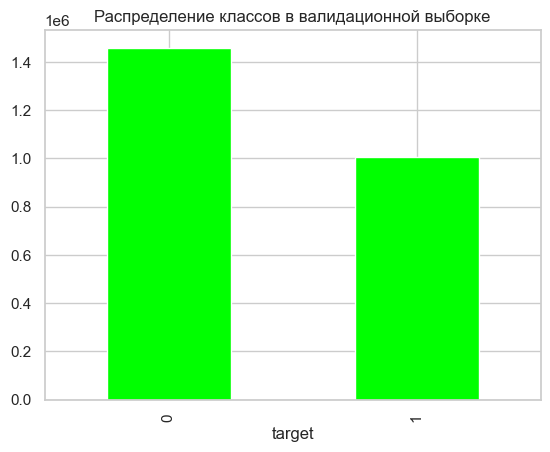

In [195]:
val["target"].value_counts().plot(kind="bar", color="lime", title="Распределение классов в валидационной выборке")

### Цены

In [40]:
print(f"Минимальная цена: {train['price'].min()}, максимальная цена: {train['price'].max()}")

Минимальная цена: 0.0, максимальная цена: 999.77


In [41]:
train["price_group"] = pd.cut(
    train["price"].astype(float), bins=[i for i in range(0, 1001, 100)]
)

<Axes: title={'center': 'Ценовые группы'}, xlabel='Ценовая группа', ylabel='Продажи'>

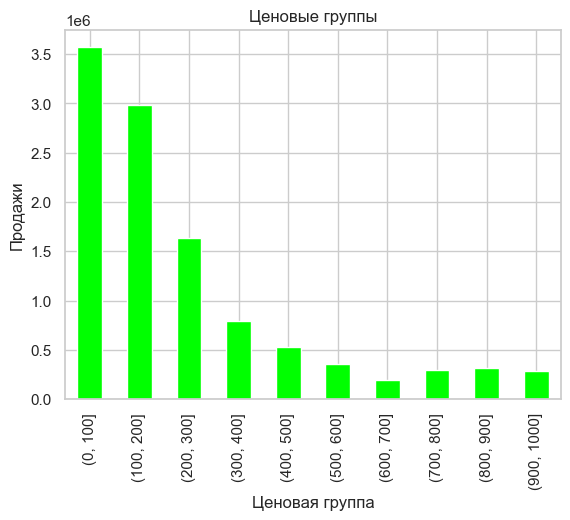

In [68]:
train.groupby(["price_group"])["product_id"].count().plot(
    kind="bar", color="lime",
    title="Ценовые группы", xlabel="Ценовая группа", ylabel="Продажи"
)

In [57]:
train["price"] = train["price"].astype(float)
product_costs = train.groupby(["product_id"]).agg({"price": [min, max, 'mean']})

In [59]:
product_costs.columns = ["price_min", "price_max", "price_mean"]
product_costs.reset_index(inplace=True)

<Axes: title={'center': 'Ценовые группы для средней цены товара'}, xlabel='Ценовая группа', ylabel='Количество товаров'>

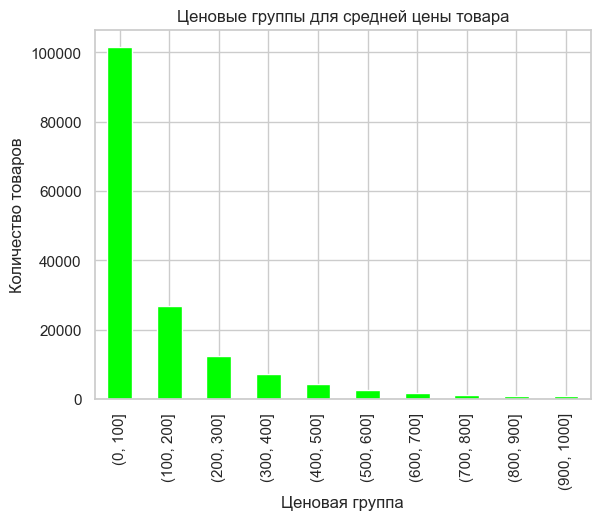

In [67]:
product_costs["price_group"] = pd.cut(
    product_costs["price_mean"].astype(float), bins=[i for i in range(0, 1001, 100)]
)
product_costs.groupby(["price_group"])["product_id"].count().plot(
    kind="bar", color="lime",
    title="Ценовые группы для средней цены товара", xlabel="Ценовая группа", ylabel="Количество товаров"
)

### Категории товаров

In [199]:
print("Уникальных категорий товаров первого уровня в тренировочных данных: ", train["cat_0"].nunique())
print("Уникальных категорий товаров первого уровня в тестовых данных: ", test["cat_0"].nunique())
print("Уникальных категорий товаров первого уровня в валидационных данных: ", val["cat_0"].nunique())

Уникальных категорий товаров первого уровня в тренировочных данных:  14
Уникальных категорий товаров первого уровня в тестовых данных:  14
Уникальных категорий товаров первого уровня в валидационных данных:  14


In [231]:
print("Количество товаров категории NA первого уровня в тренировочных данных: ", train.loc[train["cat_0"] == "NA", "cat_0"].count())
print("Количество товаров категории NA первого уровня в тестовых данных: ", test.loc[test["cat_0"] == "NA", "cat_0"].count())
print("Количество товаров категории NA первого уровня в валидационных данных: ", val.loc[val["cat_0"] == "NA", "cat_0"].count())

Количество товаров категории NA первого уровня в тренировочных данных:  1527738
Количество товаров категории NA первого уровня в тестовых данных:  270079
Количество товаров категории NA первого уровня в валидационных данных:  275192


<Axes: title={'center': 'Категории в тренировочных данных'}, xlabel='Категории 1 уровня', ylabel='Товаров'>

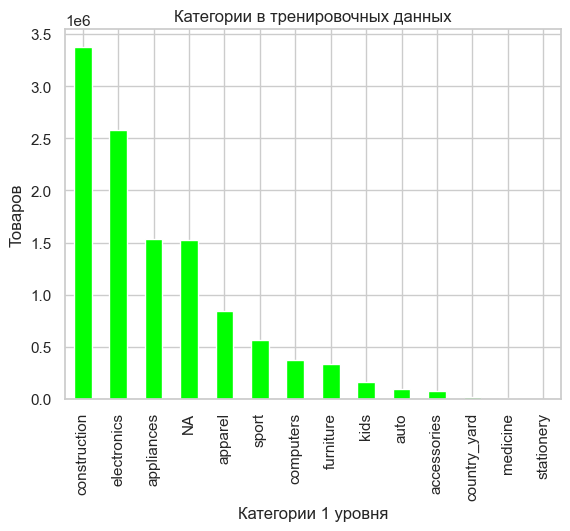

In [215]:
train["cat_0"].value_counts().plot(
    kind="bar", color="lime", title="Категории в тренировочных данных", xlabel="Категории 1 уровня", ylabel="Товаров"
)

<Axes: title={'center': 'Категории в тестовых данных'}, xlabel='Категории 1 уровня', ylabel='Товаров'>

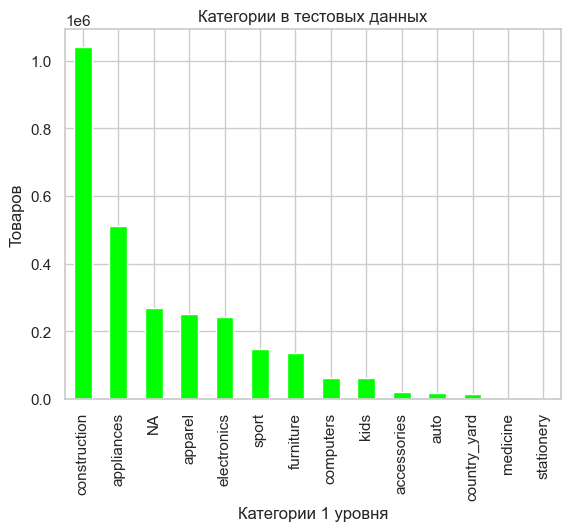

In [216]:
test["cat_0"].value_counts().plot(
    kind="bar", color="lime", title="Категории в тестовых данных", xlabel="Категории 1 уровня", ylabel="Товаров"
)

<Axes: title={'center': 'Категории в валдиационных данных'}, xlabel='Категории 1 уровня', ylabel='Товаров'>

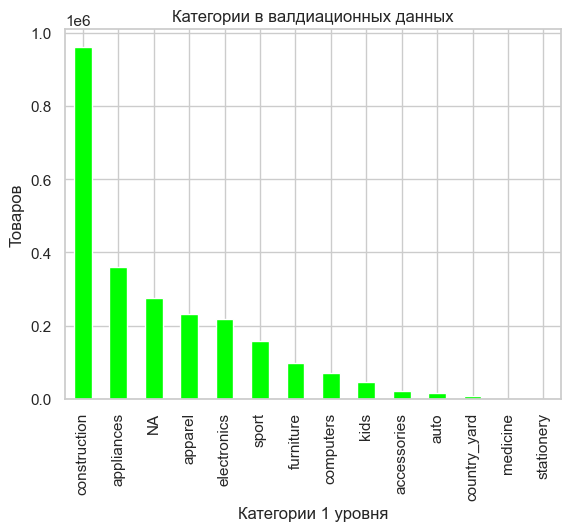

In [217]:
val["cat_0"].value_counts().plot(
    kind="bar", color="lime", title="Категории в валдиационных данных", xlabel="Категории 1 уровня", ylabel="Товаров"
)

In [218]:
print("Уникальных категорий товаров второго уровня в тренировочных данных: ", train["cat_1"].nunique())
print("Уникальных категорий товаров второго уровня в тестовых данных: ", test["cat_1"].nunique())
print("Уникальных категорий товаров второго уровня в валидационных данных: ", val["cat_1"].nunique())

Уникальных категорий товаров второго уровня в тренировочных данных:  61
Уникальных категорий товаров второго уровня в тестовых данных:  63
Уникальных категорий товаров второго уровня в валидационных данных:  61


Категории товаров, которые есть тестовых данных, но отсутствуют в тренировочных данных

In [225]:
test.loc[~test["cat_1"].isin(train["cat_1"]), "cat_1"].value_counts()

cat_1
paper       22
watering     3
Name: count, dtype: int64

<Axes: title={'center': 'Топ 20 категорий 2го уровня в тренировочных данных'}, xlabel='Категории 2го уровня ', ylabel='Товаров'>

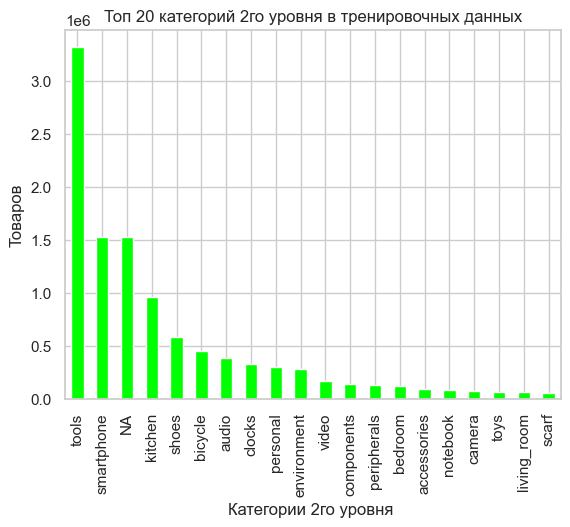

In [226]:
train["cat_1"].value_counts()[:20].plot(
    kind="bar",
    color="lime",
    title="Топ 20 категорий 2го уровня в тренировочных данных",
    xlabel="Категории 2го уровня", ylabel="Товаров"
)

<Axes: title={'center': 'Топ 20 категорий 2го уровня в тестовых данных'}, xlabel='Категории 2го уровня', ylabel='Товаров'>

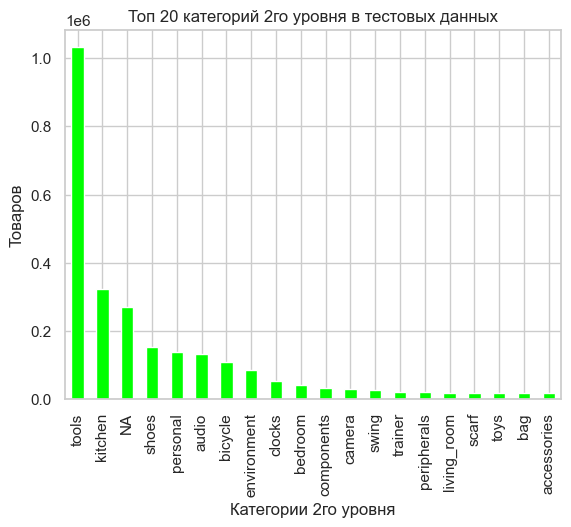

In [228]:
test["cat_1"].value_counts()[:20].plot(
    kind="bar", color="lime",
    title="Топ 20 категорий 2го уровня в тестовых данных",
    xlabel="Категории 2го уровня", ylabel="Товаров"
)

<Axes: title={'center': 'Топ 20 категорий 2го уровня в валдиационных данных'}, xlabel='Категории 2го уровня ', ylabel='Товаров'>

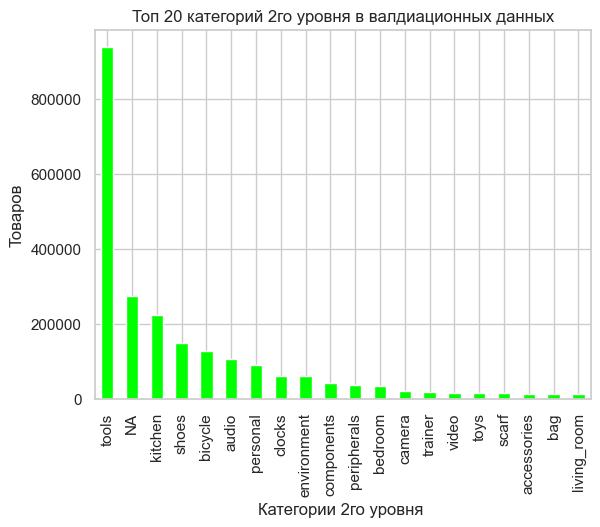

In [229]:
val["cat_1"].value_counts()[:20].plot(
    kind="bar", color="lime",
    title="Топ 20 категорий 2го уровня в валдиационных данных",
    xlabel="Категории 2го уровня ", ylabel="Товаров"
)

<Axes: title={'center': 'Топ 20 категорий 3го уровня в тренировочных данных'}, xlabel='Категории 3го уровня', ylabel='Товаров'>

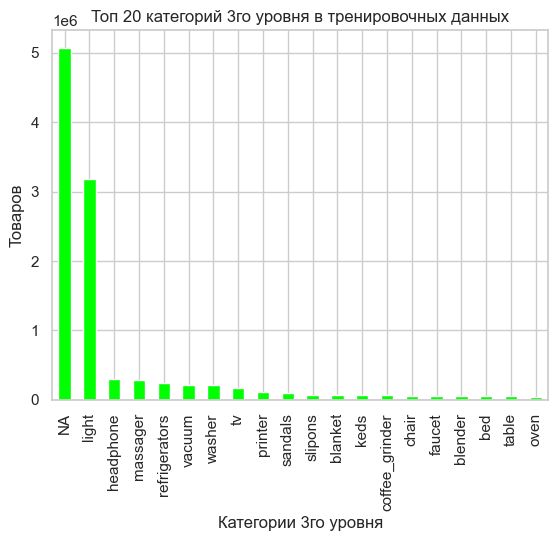

In [5]:
train["cat_2"].value_counts()[:20].plot(
    kind="bar",
    color="lime",
    title="Топ 20 категорий 3го уровня в тренировочных данных",
    xlabel="Категории 3го уровня", ylabel="Товаров"
)

<Axes: title={'center': 'категории 4го уровня в тренировочных данных'}, xlabel='Категории 4го уровня', ylabel='Товаров'>

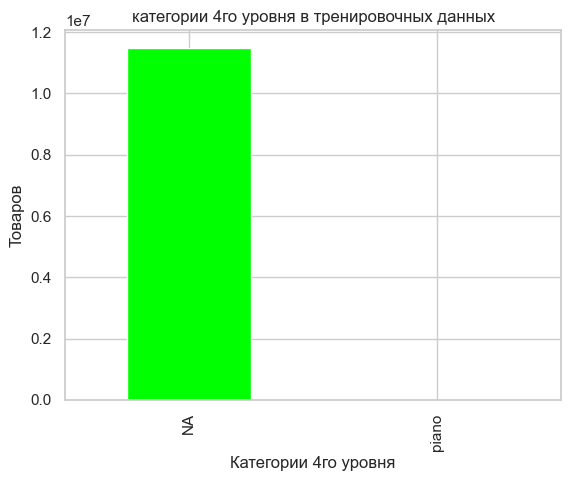

In [7]:
train["cat_3"].value_counts().plot(
    kind="bar",
    color="lime",
    title="категории 4го уровня в тренировочных данных",
    xlabel="Категории 4го уровня", ylabel="Товаров"
)

### Фичи времени

<Axes: title={'center': 'Продажи по месяцам'}, xlabel='Номер месяца', ylabel='Продажи'>

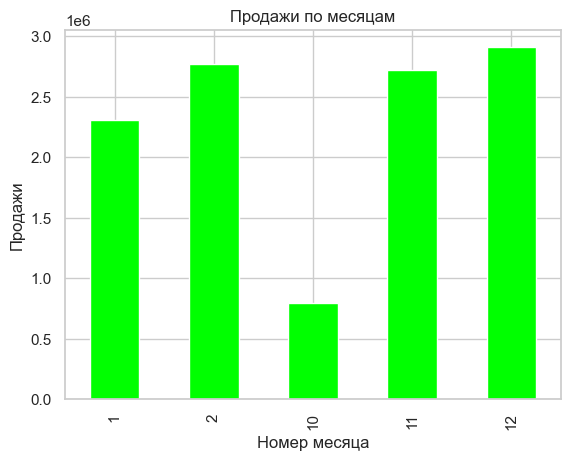

In [70]:
train.groupby(["ts_month"])["product_id"].count().plot(
    kind="bar", color="lime",
    title="Продажи по месяцам",
    xlabel="Номер месяца", ylabel="Продажи"
)

<Axes: title={'center': 'Продажи по месяцам в тестовых данных'}, xlabel='Номер месяца', ylabel='Продажи'>

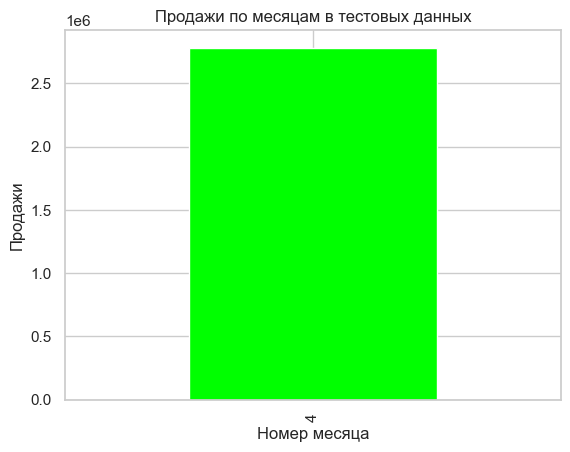

In [76]:
test.groupby(["ts_month"])["product_id"].count().plot(
    kind="bar", color="lime",
    title="Продажи по месяцам в тестовых данных",
    xlabel="Номер месяца", ylabel="Продажи"
)

<Axes: title={'center': 'Продажи по месяцам в валидационных данных'}, xlabel='Номер месяца', ylabel='Продажи'>

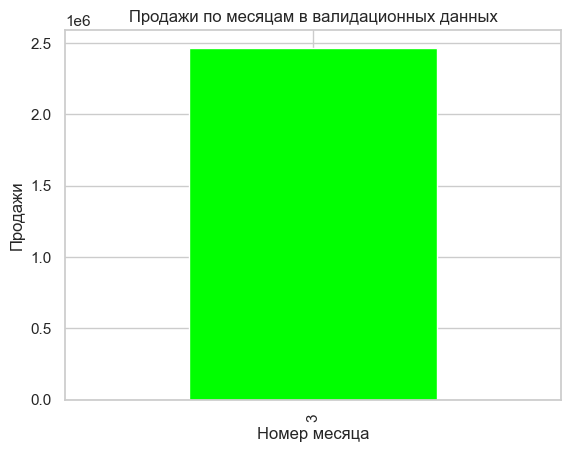

In [77]:
val.groupby(["ts_month"])["product_id"].count().plot(
    kind="bar", color="lime",
    title="Продажи по месяцам в валидационных данных",
    xlabel="Номер месяца", ylabel="Продажи"
)

<Axes: title={'center': 'Продажи по дням недели'}, xlabel='День недели', ylabel='Продажи'>

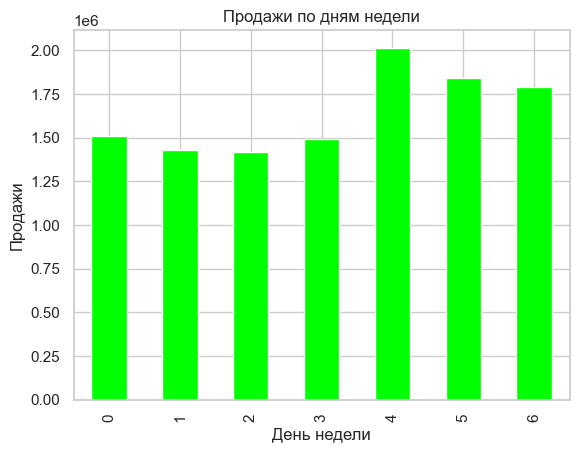

In [71]:
train.groupby(["ts_weekday"])["product_id"].count().plot(
    kind="bar", color="lime",
    title="Продажи по дням недели",
    xlabel="День недели", ylabel="Продажи"
)

<Axes: title={'center': 'Продажи по дням месяца'}, xlabel='Номер дня в месяце', ylabel='Продажи'>

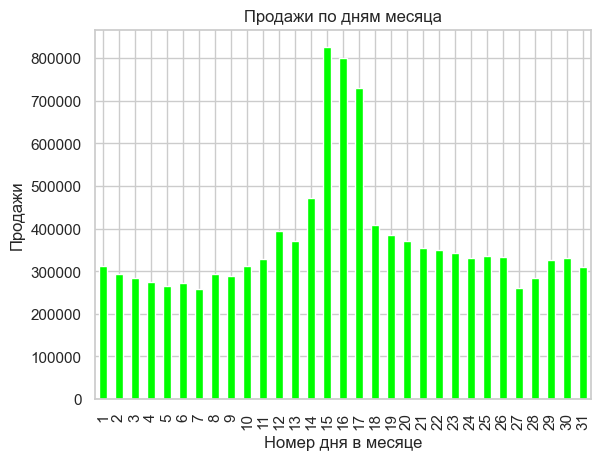

In [73]:
train.groupby(["ts_day"])["product_id"].count().plot(
    kind="bar", color="lime",
    title="Продажи по дням месяца",
    xlabel="Номер дня в месяце", ylabel="Продажи"
)

<Axes: title={'center': 'Продажи по часам'}, xlabel='Время в часах', ylabel='Продажи'>

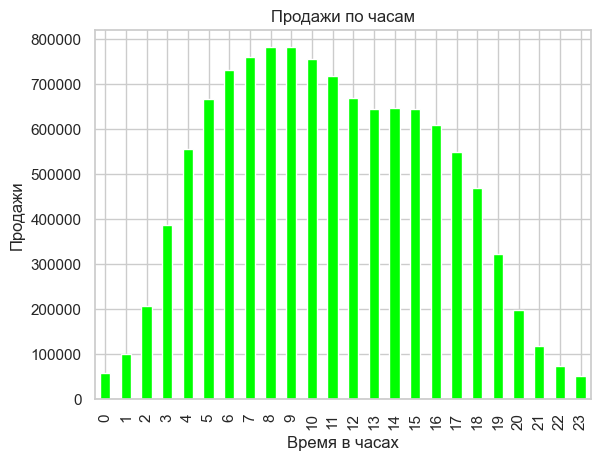

In [78]:
train.groupby(["ts_hour"])["product_id"].count().plot(
    kind="bar", color="lime",
    title="Продажи по часам",
    xlabel="Время в часах", ylabel="Продажи"
)